In [10]:
%matplotlib inline
import pandas as pd
import seaborn as s
import matplotlib.pyplot as p

In [2]:
titles=pd.read_csv('titles.csv')
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [3]:
vs=pd.read_csv('cast.csv')
vs.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# Using groupby(), plot the number of films that have been released each decade in the history of cinema.


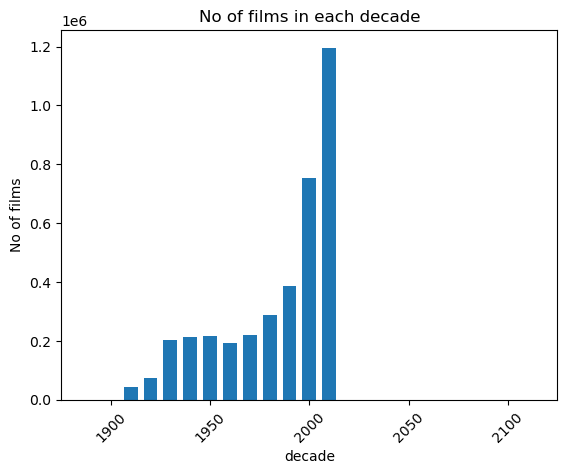

In [21]:
vs['decade']=(vs['year']//10)*10
a=vs.groupby('decade').size().reset_index(name='count')
p.bar(a['decade'],a['count'],width=7,align='center')
p.xlabel('decade')
p.ylabel('No of films')
p.title('No of films in each decade')
p.xticks(rotation=45)
p.show()

# Use groupby() to plot the number of "Hamlet" films made each decade.

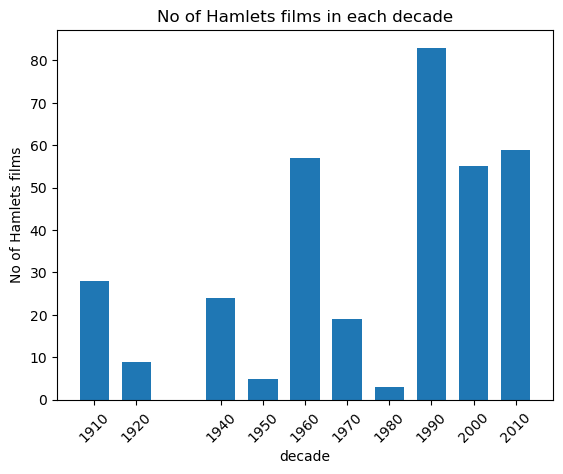

In [32]:
vs['decade']=(vs['year']//10)*10
b=vs[vs['title']=='Hamlet']
a=b.groupby('decade').size().reset_index(name='count')
p.bar(a['decade'],a['count'],width=7,align='center')
p.xlabel('decade')
p.ylabel('No of Hamlets films')
p.title('No of Hamlets films in each decade')
p.xticks(a['decade'], [str(i) for i in a['decade']], rotation=45)
p.show()

# How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s

In [4]:
a=vs[(vs['type']=='actress')&(vs['n']==1)&(vs['year'].between(1950,1959))]['name'].nunique()
b=vs[(vs['type']=='actor')&(vs['n']==1)&(vs['year'].between(1950,1959))]['name'].nunique()
print("NO OF actors: ",a)
print("NO OF actress: ",b)

NO OF actors:  1301
NO OF actress:  2235


# In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?


In [40]:
a=vs[(vs['n'].between(1,5))&(vs['year'].between(1950,1959))]
r=a.groupby(['type','n']).size().reset_index(name='count')
o=r.pivot(index='type',columns='n',values='count').fillna(0)
print("NO OF roles for actors and actesses:")
print(o)

NO OF roles for actors and actesses:
n         1.0   2.0   3.0   4.0   5.0
type                                 
actor    6692  4640  5654  5663  5674
actress  3040  4635  3201  2881  2592


# Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [53]:
vs[vs['character']=='Pink Panther']['character'].groupby(vs['name']).size().reset_index(name='role_count')



,name,role_count
0,Ching Wong,1
1,Li-Peng Wan,1


# List, in order by year, each of the films in which Frank Oz has played more than 1 role.



In [58]:
vs[(vs['name']=='Frank Oz')&(vs['n']>1)].sort_values('year')

,title,year,name,type,character,n,decade
1723645,The Muppet Movie,1979,Frank Oz,actor,Miss Piggy,2.0,1970
1723652,The Muppet Movie,1979,Frank Oz,actor,Motorcycle Guy,2.0,1970
1723651,The Muppet Movie,1979,Frank Oz,actor,Swedish Chef (assistant),2.0,1970
1723650,The Muppet Movie,1979,Frank Oz,actor,Marvin Suggs,2.0,1970
1723649,The Muppet Movie,1979,Frank Oz,actor,Doc Hopper's Men,2.0,1970
...,...,...,...,...,...,...,...
1723619,Star Wars: Episode II - Attack of the Clones,2002,Frank Oz,actor,Yoda,6.0,2000
1723661,Zathura: A Space Adventure,2005,Frank Oz,actor,Robot,6.0,2000
1723620,Star Wars: Episode III - Revenge of the Sith,2005,Frank Oz,actor,Yoda,7.0,2000
1723605,Inside Out,2015,Frank Oz,actor,Subconscious Guard Dave,14.0,2010


# List each of the characters that Frank Oz has portrayed at least twice.

In [64]:
a=vs[(vs['name']=='Frank Oz')&(vs['n']>=2)]['character'].value_counts()
a[a>=2]

character
Miss Piggy        6
Animal            6
Yoda              5
Sam the Eagle     5
Fozzie Bear       4
Cookie Monster    4
Bert              3
Grover            2
Name: count, dtype: int64